Nama : Arifatul Mayya Kholidha

NIM : 24060122120003

LAB : ML-C1

1. Memuat Dataset

Langkah ini memuat dataset dari file cars_clus.csv, menampilkan dimensi dataset, serta lima baris pertama untuk memeriksa isi data.

In [1]:
# Import library yang diperlukan
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt

# Memuat dataset
dataset = pd.read_csv("cars_clus.csv")
print(f"Dimensi dataset: {dataset.shape}")
print("Lima baris pertama dataset:")
print(dataset.head())


Dimensi dataset: (159, 16)
Lima baris pertama dataset:
  manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0  


Output menunjukkan bahwa dataset cars_clus.csv berhasil dimuat dengan 159 baris dan 16 kolom. Lima baris pertama dataset ditampilkan, memperlihatkan informasi dasar seperti nama manufaktur (manufact), model kendaraan (model), serta berbagai fitur numerik seperti sales, price, engine_s, dan mpg. Ini memberikan gambaran awal tentang struktur dan isi data sebelum dilakukan pembersihan atau analisis lebih lanjut.

2. Pembersihan Data

Bagian ini membersihkan data dengan mengonversi kolom numerik ke tipe numerik dan menghapus baris dengan nilai hilang.

In [2]:
# Data Cleaning
print("Dimensi dataset sebelum pembersihan: ", dataset.shape)

# Daftar kolom numerik yang akan diproses
cols = ['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow',
        'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

# Mengonversi kolom menjadi tipe numerik
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce')

# Menghapus baris dengan nilai yang hilang dan mereset indeks
dataset_cleaned = dataset.dropna().reset_index(drop=True)

print("Dimensi dataset setelah pembersihan: ", dataset_cleaned.shape)
print("Lima baris pertama setelah pembersihan:")
print(dataset_cleaned.head())


Dimensi dataset sebelum pembersihan:  (159, 16)
Dimensi dataset setelah pembersihan:  (117, 16)
Lima baris pertama setelah pembersihan:
  manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0  
4     108.7   76.1   192.0     3.561      18.5  22.0    

Setelah proses pembersihan, dimensi dataset berubah menjadi 117 baris dan 16 kolom, menunjukkan bahwa 42 baris dihapus karena mengandung nilai yang hilang (NaN). Lima baris pertama setelah pembersihan ditampilkan, memastikan bahwa semua kolom numerik kini memiliki data yang valid dan konsisten. Pembersihan ini penting untuk memastikan bahwa analisis selanjutnya dilakukan pada data yang lengkap dan bebas dari ketidaksesuaian.



3. Normalisasi Data

Bagian ini melakukan normalisasi pada kolom numerik untuk merentangkan nilai dalam rentang [0, 1].

In [3]:
# Normalisasi Data
scaler = MinMaxScaler()
dataset_cleaned[cols] = scaler.fit_transform(dataset_cleaned[cols])

print("Data setelah normalisasi (5 data pertama):")
print(dataset_cleaned.head())


Data setelah normalisasi (5 data pertama):
  manufact    model     sales    resale  type     price  engine_s  horsepow  \
0    Acura  Integra  0.031102  0.179516   0.0  0.167178  0.114286  0.215190   
1    Acura       TL  0.072669  0.235855   0.0  0.261228  0.314286  0.430380   
2    Acura       RL  0.015687  0.393733   0.0  0.446603  0.357143  0.392405   
3     Audi       A4  0.037537  0.274002   0.0  0.201118  0.114286  0.240506   
4     Audi       A6  0.034545  0.294839   0.0  0.336877  0.257143  0.367089   

   wheelbas     width    length  curb_wgt  fuel_cap       mpg   lnsales  \
0  0.186551  0.281437  0.306258  0.231056  0.133641  0.433333  0.592353   
1  0.336226  0.461078  0.579228  0.503727  0.317972  0.333333  0.691765   
2  0.477223  0.526946  0.628495  0.607143  0.354839  0.233333  0.512588   
3  0.216920  0.335329  0.380826  0.342547  0.281106  0.400000  0.614353   
4  0.349241  0.808383  0.567244  0.517391  0.377880  0.233333  0.604706   

   partition  
0          0  
1

Output menampilkan lima baris pertama dari dataset yang telah dinormalisasi menggunakan MinMaxScaler. Semua nilai numerik kini berada dalam rentang 0 hingga 1, memastikan bahwa setiap fitur memiliki skala yang sama. Misalnya, kolom sales yang awalnya memiliki nilai tinggi kini terkonversi menjadi angka desimal kecil. Normalisasi ini penting untuk mencegah fitur dengan skala besar mendominasi analisis PCA.

4. Principal Component Analysis (PCA)
Langkah ini mereduksi dimensi data menjadi dua kom

In [4]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_cleaned[cols])

# Menambahkan hasil PCA ke dataset
dataset_cleaned['PCA1'] = pca_result[:, 0]
dataset_cleaned['PCA2'] = pca_result[:, 1]

print("Hasil PCA (5 data pertama):")
print(dataset_cleaned[['PCA1', 'PCA2']].head())


Hasil PCA (5 data pertama):
       PCA1      PCA2
0 -0.527227  0.182464
1 -0.161328 -0.196441
2 -0.025368 -0.452034
3 -0.395402  0.047885
4 -0.040972 -0.353068


Hasil PCA menunjukkan dua komponen utama (PCA1 dan PCA2) yang ditambahkan ke dataset. Lima baris pertama dari kolom PCA ditampilkan, memperlihatkan nilai-nilai baru yang merepresentasikan data dalam dua dimensi utama. PCA ini membantu mereduksi kompleksitas data sambil mempertahankan sebagian besar variansi, memudahkan visualisasi dan analisis pola dalam data.

5. Menampilkan Daftar Manufaktur

Langkah ini menampilkan daftar manufaktur unik dari dataset.

In [5]:
# Menampilkan daftar manufaktur mobil
if 'manufact' in dataset_cleaned.columns:
    manufacturers = dataset_cleaned['manufact'].unique()
    print("Daftar manufaktur:")
    for i, manufact in enumerate(manufacturers, start=1):
        print(f"{i}. {manufact}")
else:
    print("Kolom 'manufact' tidak ditemukan dalam dataset.")


Daftar manufaktur:
1. Acura
2. Audi
3. BMW
4. Buick
5. Cadillac
6. Chevrolet
7. Chrysler
8. Dodge
9. Ford
10. Honda
11. Hyundai
12. Infiniti
13. Jeep
14. Lexus
15. Lincoln
16. Mitsubishi
17. Mercury
18. Mercedes-Benz
19. Nissan
20. Oldsmobile
21. Plymouth
22. Pontiac
23. Porsche
24. Saturn
25. Toyota
26. Volkswagen


Output tersebut menampilkan daftar manufaktur unik yang ada dalam kolom **`manufact`** pada dataset `dataset_cleaned`. Dengan menggunakan fungsi `unique()`, setiap nilai yang berbeda dalam kolom `manufact` diambil dan dicetak dalam urutan numerik. Daftar manufaktur ini mencakup berbagai merek mobil, seperti **Acura**, **Audi**, **BMW**, **Buick**, dan seterusnya, hingga **Volkswagen**. Ini memberikan gambaran tentang merek-merek mobil yang tercatat dalam dataset. Jika kolom `manufact` tidak ditemukan dalam dataset, maka pesan kesalahan akan ditampilkan, yang memastikan bahwa analisis hanya dilakukan pada data yang valid.

6. Visualisasi PCA

Bagian ini membuat grafik PCA 2D dengan warna berdasarkan manufaktur tertentu.

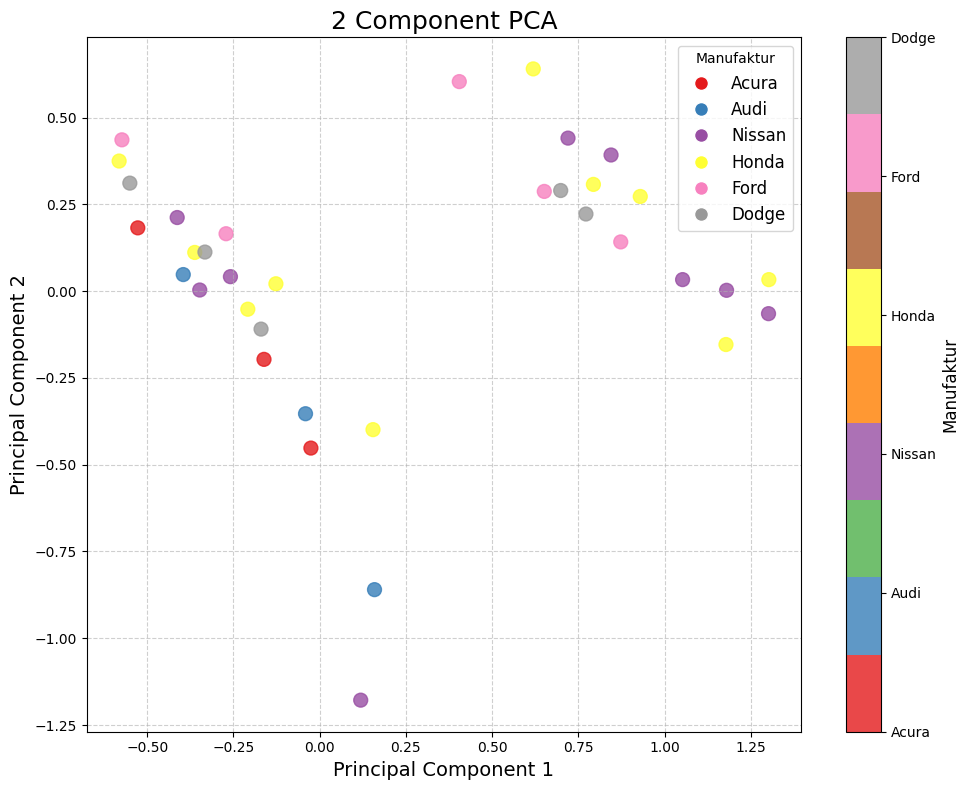

In [7]:
# Visualisasi PCA dengan warna berdasarkan manufaktur tertentu
target_manufacturers = ['Acura', 'Audi', 'Nissan', 'Honda', 'Ford', 'Dodge']  # Manufaktur yang dipilih
dataset_filtered = dataset_cleaned[dataset_cleaned['manufact'].isin(target_manufacturers)].copy()

# Encode manufaktur menjadi angka untuk pewarnaan
label_encoder = LabelEncoder()
dataset_filtered['manufact_encoded'] = label_encoder.fit_transform(dataset_filtered['manufact'])

plt.figure(figsize=(10, 8))  # Ukuran grafik diperbesar
scatter = plt.scatter(
    dataset_filtered['PCA1'],
    dataset_filtered['PCA2'],
    c=dataset_filtered['manufact_encoded'],
    cmap='Set1',
    s=100,  # Ukuran titik diperbesar
    alpha=0.8  # Transparansi diatur untuk lebih jelas
)

# Menambahkan judul dan label sumbu
plt.title("2 Component PCA", fontsize=18)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)

# Menambahkan legenda manual
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i in range(len(target_manufacturers))]
plt.legend(handles, target_manufacturers, title="Manufaktur", loc="upper right", fontsize=12)

# Menambahkan color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Manufaktur", fontsize=12)
cbar.set_ticks(range(len(target_manufacturers)))
cbar.set_ticklabels(target_manufacturers)

# Menambahkan grid untuk memperjelas grafik
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Grafik yang ditampilkan adalah hasil dari **Principal Component Analysis (PCA)**, yang memproyeksikan data kendaraan ke dalam dua komponen utama, yaitu **Principal Component 1 (PCA1)** dan **Principal Component 2 (PCA2)**. Grafik ini bertujuan untuk memperlihatkan pola distribusi kendaraan berdasarkan dua dimensi utama yang dihasilkan oleh PCA, yang menjelaskan sebagian besar variansi dalam dataset. Sumbu X mewakili **PCA1**, sedangkan sumbu Y mewakili **PCA2**. Setiap titik pada grafik mewakili satu kendaraan, dengan warna titik menunjukkan manufaktur kendaraan tersebut. Misalnya, kendaraan dari **Acura** diwakili oleh warna merah, **Audi** dengan biru, **Nissan** dengan ungu, dan seterusnya. Grafik ini menunjukkan bahwa kendaraan dari manufaktur yang sama, seperti **Acura**, **Audi**, dan **Honda**, cenderung terkelompok di bagian tertentu dari grafik, sementara manufaktur lainnya seperti **Dodge** dan **Ford** memiliki distribusi yang lebih tersebar. Visualisasi ini sangat berguna untuk melihat perbedaan dan kesamaan kendaraan berdasarkan fitur-fitur utama, seperti harga, tenaga mesin, dan dimensi fisik, yang direduksi menjadi dua komponen utama. Dengan demikian, PCA membantu dalam memahami hubungan antar kendaraan dan memungkinkan identifikasi pola atau klaster yang terbentuk berdasarkan karakteristik utama mereka.